# PREÇO DE IMÓVEIS

## IMPORTAÇÕES DE BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## IMPORTAÇÃO DO DATASET

In [2]:
#dataset da kaggle
housing = pd.read_csv('C:/Users/PICHAU/Desktop/Análises de dados/Machine Learning/Regressão Linear/dados/USA_Housing.csv')
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
#Visualizar o tamanho do dataset
print(f'O dataset possui {housing.shape[0]} linhas e {housing.shape[1]} colunas')

O dataset possui 5000 linhas e 7 colunas


In [4]:
#Visualizar algumas informações em geral e dados faltantes
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


## ANÁLISE EXPLORATÓRIA

In [1]:
sns.set_style('whitegrid')
sns.set_palette('winter')

NameError: name 'sns' is not defined

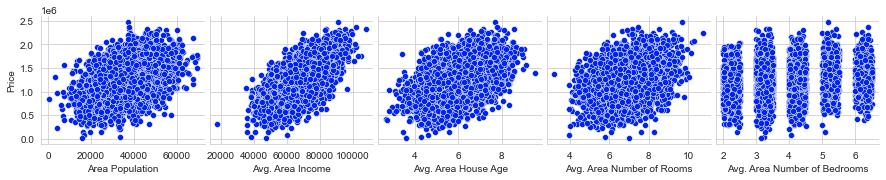

In [6]:
#Análise prévia sobre a variável Price
sns.pairplot(data = housing, x_vars=['Area Population','Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
                                      'Avg. Area Number of Bedrooms'],
            y_vars='Price')

<AxesSubplot:>

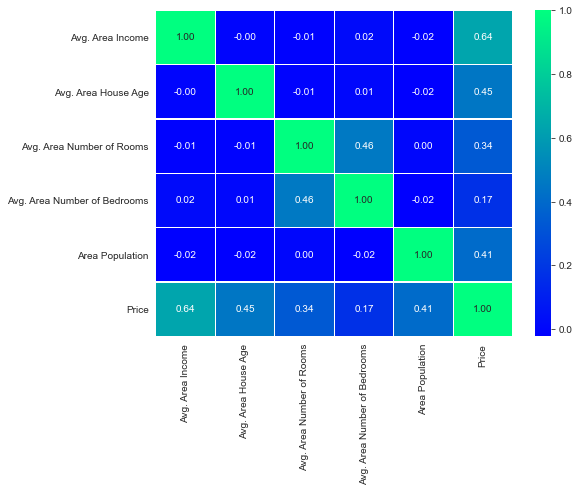

In [7]:
#Quanto mais proximo do 1(verde) o heatmap indica uma forte correlação.
#Quanto mais próximo do 0(azul) o heatmap indica uma baixa correlação.
plt.figure(figsize=(8,6))
sns.heatmap(housing.corr(),annot=True,fmt='.2f',linewidths=.3, cmap='winter')

### DIVISÃO DOS DADOS DE TREINO E TESTE

In [8]:
housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [9]:
X = housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = housing['Price']

In [10]:
# Importação da biblioteca Sklearn
from sklearn.model_selection import train_test_split

In [11]:
#Serapação dos dados em treino e teste usando o train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 50)

In [12]:
# Importação da biblioteca de Regressão Linear do sklearn
from sklearn.linear_model import LinearRegression

In [13]:
#Criando Instancia
lm = LinearRegression()

In [14]:
#Treinar o modelo
lm.fit(X_train, y_train)

LinearRegression()

In [15]:
#Também conhecido como intercepto y, é simplesmente o valor no qual a linha ajustada cruza o eixo y
lm.intercept_

-2640561.907234837

In [16]:
print(lm.coef_)

[2.15254350e+01 1.66415114e+05 1.19802717e+05 1.78316610e+03
 1.53875396e+01]


In [17]:
#Verificando os coeficientes
coef = pd.DataFrame(lm.coef_.round(2),X.columns, columns=['coefs'])
coef

,coefs
Avg. Area Income,21.53
Avg. Area House Age,166415.11
Avg. Area Number of Rooms,119802.72
Avg. Area Number of Bedrooms,1783.17
Area Population,15.39


##### Interpretendo os coeficientes:

##### Mantendo todas as outras variáveis fixas, com aumento de 1 unidade em Avg. Area Income temos um aumento de: 21.53 no preço.
##### Mantendo todas as outras variáveis fixas, com aumento de 1 unidade em Avg. Area House Age temos um aumento de: 166.415,11 no preço.
##### Mantendo todas as outras variáveis fixas, com aumento de 1 unidade em Avg. Area Number of Rooms temos um aumento de: 119.802,72 no preço.
##### Mantendo todas as outras variáveis fixas, com aumento de 1 unidade em Avg. Area Number of Bedrooms temos um aumento de: 1.783,17 no preço.
##### Mantendo todas as outras variáveis fixas, com aumento de 1 unidade em Area Population temos um aumento de: 15,39 no preço.

In [18]:
#Predizer os preços
predict = lm.predict(X_test)

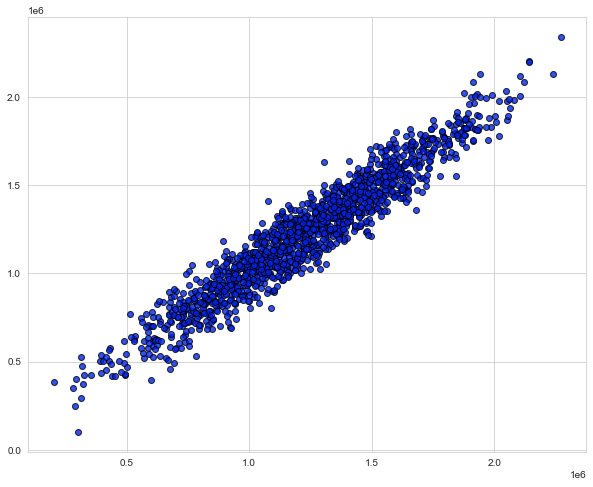

In [39]:
#Grafico de disperção com os dados reais e os dados preditos
plt.figure(figsize=(10,8))
plt.scatter(x=y_test, y=predict,edgecolor='black',alpha=0.8)

C:\Users\PICHAU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

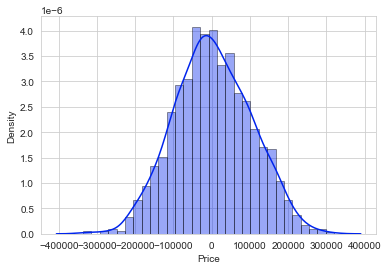

In [20]:
#Grafico Histograma traçar um histograma dos resíduos e certificar-se de que parece distribuído normalmente.
sns.distplot((y_test - predict), bins = 30, hist_kws=dict(edgecolor="black"))

Calculando o erro médio absoluto, o erro médio quadrático e o erro médio quadrático

*MAE* é o mais fácil de entender, porque é o erro médio.

*MSE* é mais popular do que o MAE, porque o MSE "pune" erros maiores, o que tende a ser útil no mundo real.

*RMSE* é ainda mais popular que o MSE, porque o RMSE é interpretável nas unidades "y".

In [40]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 80728.93384538869
MSE: 10077066685.864872
RMSE: 100384.59386711127
